In [1]:
# Import packages 
 
# Import dependencies
import numpy as np
import scipy as sc
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os 
import tifffile as tiff
import seaborn as sns
import pandas as pd
from scipy.signal import butter, lfilter, bessel, ellip, firwin, filtfilt, get_window
import tables as tb
from scipy import ndimage
from scipy import misc 
import cv2
from ipywidgets import interact
#from pandas.tools.plotting import parallel_coordinates
#sns.set(style = "ticks",palette = "muted", color_codes = True)


sns.set(style = "ticks",palette = "muted", color_codes = True)

%matplotlib inline



In [2]:
rel_vs_resp_all = pd.DataFrame.from_csv('ReliabilityVsResponsivenessDataAll_newDataAll_crossvalidated_complete.csv')

In [3]:
mean_and_std = pd.DataFrame.from_csv(r"C:\Users\nataliam\Documents\ResponsivenessCriteria\mean_and_std.csv")
mean_and_std_df = mean_and_std.set_index('cell_specimen_id')
rel_vs_resp_all['peak_std'] = mean_and_std_df.loc[rel_vs_resp_all.cell_specimen_id]['peak_std'].values
rel_vs_resp_all['peak_var'] = mean_and_std_df.loc[rel_vs_resp_all.cell_specimen_id]['peak_std'].values**2
rel_vs_resp_all['peak_std'].head()

0     4.794675
1    17.005438
2     2.040140
3     1.418096
4    55.522074
Name: peak_std, dtype: float64

In [4]:
dsi = pd.DataFrame.from_csv(r"C:\Users\nataliam\Documents\ResponsivenessCriteria\MeanVsStd\DSI.csv")
dsi_df = dsi.set_index('cell_specimen_ids')
rel_vs_resp_all['dsi'] = dsi_df.loc[rel_vs_resp_all.cell_specimen_id]['dsi'].values
rel_vs_resp_all['dsi_thresh'] = dsi_df.loc[rel_vs_resp_all.cell_specimen_id]['dsi_thresh'].values
rel_vs_resp_all['dsi_blank'] = dsi_df.loc[rel_vs_resp_all.cell_specimen_id]['dsi_blank'].values
rel_vs_resp_all['dsi_blank_thresh'] = dsi_df.loc[rel_vs_resp_all.cell_specimen_id]['dsi_blank_thresh'].values
rel_vs_resp_all['dsi'] = rel_vs_resp_all['dsi'].astype(np.float)

In [5]:
rel_vs_resp_all = rel_vs_resp_all.iloc[np.where(~np.isnan(rel_vs_resp_all['dsi_thresh']))]

In [6]:
rel_vs_resp_all.shape

(16923, 71)

In [7]:
colors = ['r', 'b', 'g','m', 'c']
criteria = ['Tohmi', 'Andermann','Sun', 'Roth', 'Marshel']
studies = ['Study 5','Study 3', 'Study 1', 'Study 2', 'Study 4']

area_order = ['VISp','VISl','VISpm','VISal','VISam','VISrl']
area_colors_s = sns.color_palette("Reds_r", n_colors = len(area_order))

area_colors_n = ['#7F7F7F','#764C9E','#B11F24','#84C451','#3B51A3' ,'#226633']




In [8]:
df = pd.DataFrame(index = [0], columns = criteria)
total_cells = np.float(rel_vs_resp_all.shape[0])
for crit in criteria:
    df[crit] = rel_vs_resp_all[(rel_vs_resp_all[crit]==True) & (rel_vs_resp_all['area'] == 'VISp')].shape[0]


In [9]:
def plot_density(x_name, y_name, data, ax = None):
    
    x = data[x_name]
    y = data[y_name]
    xy = np.vstack([x,y])
    z = st.gaussian_kde(xy)(xy)
    #print z.max()
    if ax == None:
        plt.scatter(x, y, c=z, s=10, edgecolor='', cmap='hot', vmin = 0, vmax = 0.0075, label = '_nolegend_')

    else:
        ax.scatter(x, y, c=z, s=20, edgecolor='', cmap='plasma', vmin = 0, vmax = 0.0075)
        
        
    #plt.colorbar()


In [10]:
area_order_lit = ['V1','LM','PM','AL','AM','RL','LI']
area_colors_lit_s = sns.color_palette("Reds_r", n_colors = len(area_order_lit))
area_colors_lit_j = ['b','r','r','b','g','c','m']
area_colors_lit_n = ['#7F7F7F','#764C9E','#B11F24','#84C451','#3B51A3','#226633','#81B2DF']

area_colors_dict  = {'V1':'#7F7F7F',
                     'LM':'#764C9E',
                     'PM': '#B11F24',
                     'AL': '#84C451',
                     'AM':'#3B51A3',
                     'RL':'#226633',
                     'LI':'#81B2DF'}
#area_markershapes_lit = ['o',]


literature_order = ['Sun', 'Roth', 'Andermann', 'Marshel', 'Tohmi']
literature_order_dict = {'Tohmi':'r', 'Andermann':'b', 'Marshel': 'm', 'Roth':
                        'c', 'Glickfeld':'g'}
literature_markershapes =  ['b','r','w','w','g','c','m']

In [11]:
literature_tf_values = pd.read_csv('literature_tf.csv')
literature_osi_values = pd.read_csv('literature_OSI.csv')
literature_dsi_values = pd.read_csv('literature_DSI.csv')


In [12]:
literature_tf_values.index = literature_tf_values['visual_area'].values
literature_osi_values.index = literature_osi_values['visual_area'].values
literature_dsi_values.index = literature_dsi_values['visual_area'].values

In [13]:
literature_tf_values = literature_tf_values.loc[area_order_lit]
literature_osi_values = literature_osi_values.loc[area_order_lit]
literature_dsi_values = literature_dsi_values.loc[area_order_lit]


In [14]:
sns.set_style("white")
literature_tf_values_reset = literature_tf_values
literature_tf_values_reset.index = literature_tf_values_reset.visual_area
literature_tf_values_reset = literature_tf_values.drop('visual_area', axis =1)


literature_dsi_values_reset = literature_dsi_values
literature_dsi_values_reset.index = literature_dsi_values_reset.visual_area
literature_dsi_values_reset = literature_dsi_values_reset.drop('visual_area', axis =1)


literature_osi_values_reset = literature_osi_values
literature_osi_values_reset.index = literature_osi_values_reset.visual_area
literature_osi_values_reset = literature_osi_values_reset.drop('visual_area', axis =1)

literature_tf_values_reset = literature_tf_values_reset[literature_order[1:]]
literature_osi_values_reset = literature_osi_values_reset[literature_order]
literature_dsi_values_reset= literature_dsi_values_reset[literature_order]

In [15]:
def plot_parallel_coords(df, ax, color_palette, marker_face_color = None):
    sns.set_style("white")
    if marker_face_color == None:
        marker_face_color = color_palette
    for ii, va in enumerate(df.index):
        ax.plot(np.arange(len(df.columns)),
                  df.loc[va],
                  color = color_palette[ii],
                  mec = 'k',
                  mfc = marker_face_color[ii],
                  lw = 2,
                  marker = 'o',
                  ms = 5,
                  mew =1,
                  label = va)

# Figure 1

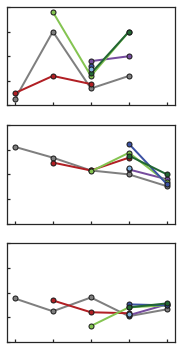

In [16]:
#sns.set_style("white")
sns.set(font_scale = .5, style = 'white')
fig01, ax = plt.subplots(3,1, figsize = (3, 6))

ax[0]


plot_parallel_coords(literature_tf_values_reset, ax[0], area_colors_lit_n)
plot_parallel_coords(literature_osi_values_reset, ax[1], area_colors_lit_n)
plot_parallel_coords(literature_dsi_values_reset, ax[2], area_colors_lit_n)
#ax[0].set_ylabel('TF (Hz)')
#ax[1].set_ylabel('gOSI')
#ax[2].set_ylabel('DSI')


#x[0].set_ylabel('TF')
ax[0].set_ylim(0,4)
#ax[2].legend(literature_tf_values_reset.index,
 #             fontsize = 'small',
#              loc = 'upper left',
#             bbox_to_anchor=(1, 0.,0.5 , 0.8))

ax[1].set_ylim(0,1)
ax[2].set_ylim(0,1)
ax[0].set_xlim(-0.2,4.2)
ax[1].set_xlim(-0.2,4.2)
ax[2].set_xlim(-0.2,4.2)

ax[0].set_xticks(np.arange(5))
ax[1].set_xticks(np.arange(5))
ax[2].set_xticks(np.arange(5))

ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
ax[2].set_xticklabels([])

ax[0].set_yticks([0,1,2,3,4])

ax[1].set_yticks([0, 0.25, 0.5, 0.75, 1])
ax[2].set_yticks([0, 0.25, 0.5, 0.75, 1])

ax[2].set_xticklabels([])
ax[0].set_yticklabels([])
ax[1].set_yticklabels([])
ax[2].set_yticklabels([])

#ax[2].set_xticklabels(['1','2','3','4','5'])
#ax[2].set_xlabel('Study')

ax[0].tick_params(direction = 'in', length = 3, top = 'off', right = 'off')
ax[1].tick_params(direction = 'in', length = 3, top = 'off', right = 'off')
ax[2].tick_params(direction = 'in', length = 3, top = 'off', right = 'off')


fig01.savefig(r"C:\Users\nataliam\Documents\ResponsivenessCriteria\191209\Figure1.pdf")

In [17]:
literature_tf_values_reset['visual_area'] = literature_tf_values['visual_area']

rel_vs_resp_all = rel_vs_resp_all[rel_vs_resp_all['peak dF/F']< 200]

In [18]:
criteria_ordered = ['Sun', 'Roth', 'Andermann', 'Marshel', 'Tohmi']
studies_ordered = ['Study 1', 'Study 2', 'Study 3', 'Study 4', 'Study 5']

In [19]:
X, Y = np.meshgrid(np.arange(100), np.arange(100))
X = X.astype(float) + 1
Y = Y.astype(float) + 1
Z = Y/X

In [20]:
def plot_density(x_name, y_name, data, ax = None):
    
    x = data[x_name]
    y = data[y_name]
    xy = np.vstack([x,y])
    z = st.gaussian_kde(xy)
    positions = np.vstack([x.ravel(), y.ravel()])
    
    Z = np.reshape(z(positions).T, x.shape)
    #print z.max()
    if ax == None:
        plt.scatter(x, y, c=z, s=10, edgecolor='', cmap='hot', vmin = 0, vmax = 0.0020, label = '_nolegend_')

    else:
        ax.scatter(x, y, c=Z, s=20, edgecolor='', cmap='plasma', vmax = 0.0020)
        
        
    #plt.colorbar()


In [21]:
np.sum(rel_vs_resp_all['peak dF/F'] <0 )

113

In [22]:
rel_vs_resp_all = rel_vs_resp_all[rel_vs_resp_all['peak dF/F'] < 200]
rel_vs_resp_all = rel_vs_resp_all[rel_vs_resp_all['peak_std'] < 200]

rel_vs_resp_all = rel_vs_resp_all[rel_vs_resp_all['peak dF/F'] > 0]
rel_vs_resp_all = rel_vs_resp_all[rel_vs_resp_all['peak_std'] > 0]

# Figure 2

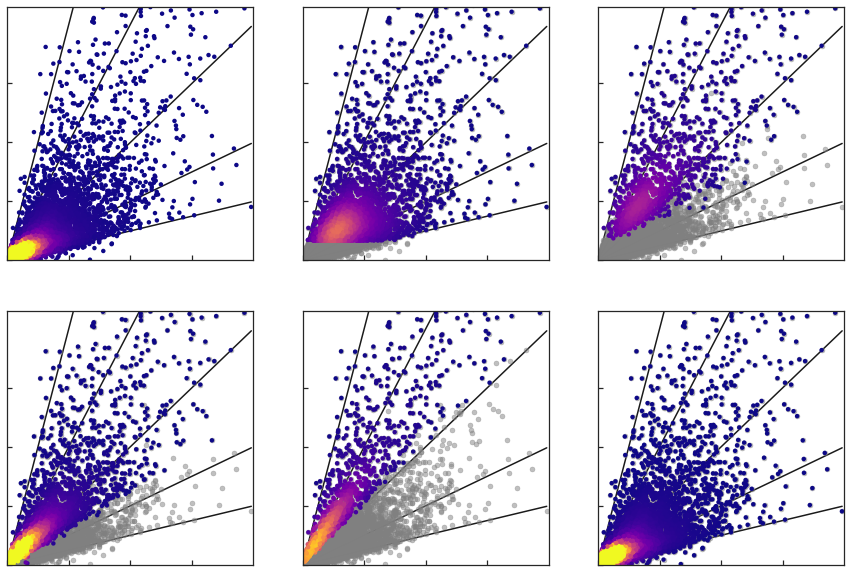

In [23]:
sns.set(font_scale = 1, style = 'white')
#plt.tight_layout()
fig02, axs = plt.subplots(2,3, figsize = (15,10), sharex = True, sharey = True)

plot_density('peak_std','peak dF/F', rel_vs_resp_all, axs[0][0])
axs[0,0].set_ylim(0,129)
#axs[0,0].set_title('All cells')
axs[0,0].tick_params(direction = 'in', length = 5, top="off", right="off")


#axs[0,0].plot(np.arange(100), color = 'k', lw = 2, label = 'unity line')
axs[0,0].set_ylabel('')

axs[0,0].plot(0.25*np.arange(120), color = 'k', zorder = 0)

axs[0,0].plot(0.5*np.arange(120), color = 'k', zorder = 0)
axs[0,0].plot(np.arange(120), color = 'k', zorder = 0)
axs[0,0].plot(2*np.arange(120), color = 'k', zorder = 0)
axs[0,0].plot(4*np.arange(120), color = 'k', zorder = 0)


axs[0,0].set_xticks([0, 25, 50, 75, 100])
axs[0,0].set_yticks([0, 25, 50, 75, 100])

axs[0,0].set_xticklabels([])
axs[0,0].set_yticklabels([])

#axs[0,0].legend(loc = 'lower right', fontsize = 'small')

for ii, ax in enumerate(axs.reshape(-1)[1:]):
    
    
    
    
    sns.regplot(x = 'peak_std', 
                y = 'peak dF/F', 
                fit_reg = False,
                data = rel_vs_resp_all, 
                color = [0.5,0.5,0.5], 
                marker = '.', 
                scatter_kws = {"s": 100, "alpha": 0.5}, 
                ax = ax)
    
    
    ax.plot(0.25*np.arange(120), color = 'k', zorder = 0)

    ax.plot(0.5*np.arange(120), color = 'k', zorder = 0)
    ax.plot(np.arange(120), color = 'k',zorder = 0)
    ax.plot(2*np.arange(120), color = 'k', zorder = 0)
    ax.plot(4*np.arange(120), color = 'k', zorder = 0)


    
    plot_density('peak_std',
                 'peak dF/F',
                 rel_vs_resp_all[rel_vs_resp_all[criteria_ordered[ii]]==True],
                 ax = ax)
    #ax.set_title(studies_ordered[ii])
    ax.set_xlim(0, 120)
    ax.set_ylabel('')
    ax.set_xlabel('')

    ax.tick_params(direction = 'in', length = 5,  top="off", right="off")
    
    ax.set_xticks(np.arange(0, 120, 30))
    ax.set_yticks(np.arange(0, 120, 30))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    
for ii, ax in enumerate(axs.reshape(-1)[:3]):
    ax.set_xlabel('')

for ii, ax in enumerate(axs.reshape(-1)[1:3]):
    ax.set_ylabel('')
    
for ii, ax in enumerate(axs.reshape(-1)[4:]):
    ax.set_ylabel('')
    

#ax.text(0.5, 0.5, '2',)


fig02.savefig(r"C:\Users\nataliam\Documents\ResponsivenessCriteria\191209\Figure21.pdf")
#fig02.savefig(r"C:\Users\nataliam\Documents\ResponsivenessCriteria\Figure2.eps")

In [24]:
def plot_density(x_name, y_name, data, ax = None):
    
    x = data[x_name]
    y = data[y_name]
    xy = np.vstack([x,y])
    z = st.gaussian_kde(xy)(xy)
    #print z.max()
    if ax == None:
        plt.scatter(x, y, c=z, s=10, edgecolor='', cmap='hot', vmin = 0, vmax = 0.0075, label = '_nolegend_')

    else:
        im = ax.scatter(x, y, c=z, s=20, edgecolor='', cmap='plasma', vmin = 0, vmax = 0.0075, zorder = 2)
        
        
    #plt.colorbar(im)


sns.set(font_scale = 1.5)
#plt.tight_layout()
fig025, axs = plt.subplots(1,1, figsize = (5,5))

axs.plot(0.25*np.arange(100), color = [0.5, 0.5, 0.5], zorder = 1)

axs.plot(0.5*np.arange(100), color = [0.5, 0.5, 0.5], zorder = 1)
axs.plot(np.arange(100), color = [0.5, 0.5, 0.5], zorder = 1)
axs.plot(2*np.arange(100), color = [0.5, 0.5, 0.5], zorder = 1)
axs.plot(4*np.arange(100), color = [0.5, 0.5, 0.5], zorder = 1)



axs.set_axis_bgcolor('none')

plot_density('peak_std','peak dF/F', rel_vs_resp_all, axs)
#sns.regplot(x = 'peak_std', 
#            y = 'peak dF/F', 
 #           fit_reg = True,
 #           ci = None,
 #           data = rel_vs_resp_all, 
   #         color = 'k', 
  #          marker = '.', 
  #          scatter_kws = {"s": 50, "alpha": 0}, 
   #         ax = axs)

    
n = 5



plt.grid(False)
axs.set_ylim(0,100)
axs.set_xlim(0,100)
axs.set_ylabel(u'peak dF/F')
axs.set_xlabel(u'Standard Deviation')

axs.text()
#plt.colorbar()
#plt.legend(loc = [1, 0.4])


#fig025.savefig(r"C:\Users\nataliam\Documents\ResponsivenessCriteria\191209\Figure25colorbar.pdf")

In [25]:
percentage_per_area = pd.DataFrame(columns = literature_order, index = area_order)

for crit in literature_order:
    for area in rel_vs_resp_all['area'].unique():
        subset = rel_vs_resp_all[rel_vs_resp_all['area'] == area]
        percentage_per_area.loc[area, crit] = np.sum(subset[crit])/ float(subset.shape[0]) * 100

In [26]:
#rel_vs_resp_all['gOSI'] = rel_vs_resp_all['OSI']

In [27]:
np.unique(rel_vs_resp_all.tf_14)

array([0., 1., 2., 3., 4.])

In [28]:
observatory_vas = rel_vs_resp_all['area'].unique()
pref_tf_df = pd.DataFrame(index = observatory_vas, columns = criteria)
pref_osi_df = pd.DataFrame(index = observatory_vas, columns = criteria)
pref_dsi_df = pd.DataFrame(index = observatory_vas, columns = criteria)


def convert_tf(df):
    df[df == 1] = 0
    df[df == 2] = 1
    df[df == 3] = 2
    df[df == 4] = 3
    df[df == 5] = 4
    return df

for crit in criteria:
    for va in observatory_vas:
        tf_vals = rel_vs_resp_all[(rel_vs_resp_all['area']==va) & (rel_vs_resp_all[crit] == True)]['tf_14']
        #tf_vals = convert_tf(tf_vals)
        pref_tf_df.loc[va, crit] = tf_vals.mean()        
        osi_vals = rel_vs_resp_all[(rel_vs_resp_all['area']==va) & (rel_vs_resp_all[crit] == True)]['osi_14']
        pref_osi_df.loc[va, crit] = osi_vals.mean()
        
        dsi_vals = rel_vs_resp_all[(rel_vs_resp_all['area']==va) & (rel_vs_resp_all[crit] == True)]['dsi_14']
        pref_dsi_df.loc[va, crit] = dsi_vals.mean()

In [29]:
2**(tf_vals)

44      1.0
81     16.0
111     2.0
20      1.0
3       8.0
41      2.0
62      8.0
1      16.0
6       1.0
13     16.0
38      4.0
39      4.0
48      1.0
3       4.0
5       1.0
23      8.0
65     16.0
66      4.0
39      4.0
49     16.0
56      4.0
87      8.0
214     4.0
Name: tf_14, dtype: float64

In [30]:
pref_tf_df = pref_tf_df[literature_order]
pref_osi_df =pref_osi_df[literature_order]
pref_dsi_df = pref_dsi_df[literature_order]

In [31]:
pref_tf_df.columns = studies
pref_osi_df.columns = studies

pref_osi_df.columns = studies


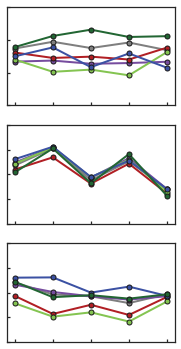

In [32]:
sns.set(font_scale = 0.5, style = 'white')
fig03, axs = plt.subplots(3,1, figsize = (3, 6))


for ii, va in enumerate(pref_tf_df.index):
    axs[0].plot(np.arange(len(pref_tf_df.columns)),
              pref_tf_df.loc[va],
              color = area_colors_n[ii],
              mec = 'k',
              lw = 2,
              marker = 'o',
              ms = 5,
              mew =1,
              label = va)
    
#axs[0].set_ylabel('TF (Hz)')
#axs[0].set_xticks([])
#axs[0].set_xticklabels(['Study 1', 'Study 2', 'Study 3', 'Study 4', 'Study 5'])
axs[0].set_xlim(-0.2, 4.2)    
    
for ii, va in enumerate(pref_osi_df.index):
    axs[1].plot(np.arange(len(pref_osi_df.columns)),
              pref_osi_df.loc[va],
              color = area_colors_n[ii],
              mec ='k',
              lw = 2,
              marker = 'o',
              ms = 5,
              mew =1,
              label = va)

#axs[1].set_ylabel('OSI')
#axs[1].set_xticks([])
#axs[1].set_xticklabels(['Study 1', 'Study 2', 'Study 3', 'Study 4', 'Study 5'])
axs[1].set_xlim(-0.2, 4.2)    


for ii, va in enumerate(pref_dsi_df.index):
    axs[2].plot(np.arange(len(pref_dsi_df.columns)),
              pref_dsi_df.loc[va],
              color = area_colors_n[ii],
              mec = 'k',
              lw = 2,
              marker = 'o',
              ms = 5,
              mew =1,
              label = va)
    
#axs[2].set_ylabel('DSI')
axs[2].set_xticks([0,1,2,3,4])
axs[2].set_xticklabels(['Study 1', 'Study 2', 'Study 3', 'Study 4', 'Study 5'])
axs[2].set_xlim(-0.2, 4.2)    
    
#axs[2].legend(area_order_lit,
 #             fontsize = 'small',
  #            loc = 'upper left',
   #          bbox_to_anchor=(1, 0.,0.4 , 0.6))
axs[2].set_ylim(0,1)
axs[1].set_ylim(0,1)

axs[0].set_xticklabels([])
axs[1].set_xticklabels([])

axs[0].set_ylim(0,3)
axs[0].set_yticks([0,1,2,3])

axs[1].set_yticks([0, 0.25, 0.5, 0.75, 1])
axs[2].set_yticks([0, 0.25, 0.5, 0.75, 1])
#axs[0].set_yticklabels(, decimals = 1))


axs[2].set_xticklabels([])
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[2].set_yticklabels([])

#ax[2].set_xticklabels(['1','2','3','4','5'])
#ax[2].set_xlabel('Study')

axs[0].tick_params(direction = 'in', length = 3, top = 'off', right = 'off')
axs[1].tick_params(direction = 'in', length = 3, top = 'off', right = 'off')
axs[2].tick_params(direction = 'in', length = 3, top = 'off', right = 'off')




fig03.savefig(r"C:\Users\nataliam\Documents\ResponsivenessCriteria\191209\Figure3-rl.pdf")

# Figure 3

In [33]:
rel_vs_resp_all = rel_vs_resp_all.reset_index()

In [34]:
#rel_vs_resp_all = rel_vs_resp_all.drop(rel_vs_resp_all[rel_vs_resp_all['DSI']<-6000].index.values)

In [35]:
rel_vs_resp_all['coeff_var'] = rel_vs_resp_all['peak_std']/rel_vs_resp_all['peak dF/F']
rel_vs_resp_all['fano_factor'] = rel_vs_resp_all['peak_var']/rel_vs_resp_all['peak dF/F']

rel_vs_resp_all['dsi_blank'][rel_vs_resp_all['dsi_blank']> 2] = np.nan
rel_vs_resp_all['dsi_blank'][rel_vs_resp_all['dsi_blank']< -2] = np.nan

In [36]:
rel_vs_resp_V1 = rel_vs_resp_all[rel_vs_resp_all.area == 'VISp']
rel_vs_resp_AL = rel_vs_resp_all[rel_vs_resp_all.area == 'VISal']
rel_vs_resp_PM = rel_vs_resp_all[rel_vs_resp_all.area == 'VISpm']
rel_vs_resp_AM = rel_vs_resp_all[rel_vs_resp_all.area == 'VISam']
rel_vs_resp_RL = rel_vs_resp_all[rel_vs_resp_all.area == 'VISrl']
rel_vs_resp_LM = rel_vs_resp_all[rel_vs_resp_all.area == 'VISl']


In [37]:
def get_projection(rel_vs_resp):
    slope, intercept, r_value, p_value, std_err = st.linregress(rel_vs_resp['peak_std'],
                                                               rel_vs_resp['peak dF/F'])
    
    
    
    rel_vs_resp_pairs = zip(rel_vs_resp['reliability'].values, rel_vs_resp['peak dF/F'].values)
    rel_vs_resp['projection'] = [np.dot(x, [1,slope]) for x in rel_vs_resp_pairs]
    return rel_vs_resp

def get_sorted_df(rel_vs_resp, sort_by = 'projection', percentiles = (np.arange(20)+1)*5, ascending = False):

    if sort_by == 'projection':
        rel_vs_resp = get_projection(rel_vs_resp)
    resp_sorted_df = pd.DataFrame(index = percentiles, columns = ['tf','dsi','osi'])
    ncells = rel_vs_resp.shape[0]
    sorted_rvr = rel_vs_resp.sort_values(sort_by, ascending = ascending)
    #sorted_rvr['TF'] = convert_tf(sorted_rvr['TF'])
    for p in percentiles: 
        to_get = int(-p/100. * ncells)
        resp_sorted_df.loc[p, 'TF'] = sorted_rvr['TF'][to_get:].mean()
        resp_sorted_df.loc[p, 'TF_nm'] = sorted_rvr['tf_14'][to_get:].mean()
       # resp_sorted_df.loc[p, 'TF_nm_std'] = sorted_rvr['TF_nm_std'][to_get:].mean()
        resp_sorted_df.loc[p, 'gOSI'] = sorted_rvr['gOSI'][to_get:].mean()
        resp_sorted_df.loc[p, 'DSI'] = sorted_rvr['DSI'][to_get:].mean()
        resp_sorted_df.loc[p, 'DSI_nm'] = sorted_rvr['dsi_14'][to_get:].mean()
        resp_sorted_df.loc[p, 'OSI_nm'] = sorted_rvr['osi_14'][to_get:].mean()
      #  resp_sorted_df.loc[p, 'DSI_nm_std'] = sorted_rvr['DSI_nm_std'][to_get:].mean()
       # resp_sorted_df.loc[p, 'OSI_nm_std'] = sorted_rvr['OSI_nm_std'][to_get:].mean()
  #      resp_sorted_df.loc[p, 'dsi'] = sorted_rvr['dsi'][to_get:].mean()
        resp_sorted_df.loc[p, 'dsi_thresh'] = sorted_rvr['dsi_thresh'][to_get:].mean()
        resp_sorted_df.loc[p, 'dsi_blank'] = sorted_rvr['dsi_blank'][to_get:].mean()
        resp_sorted_df.loc[p, 'dsi_blank_thresh'] = sorted_rvr['dsi_blank_thresh'][to_get:].mean()
        resp_sorted_df.loc[p, 'TF_std'] = np.std(sorted_rvr['TF'][to_get:])
        resp_sorted_df.loc[p, 'gOSI_std'] = np.std(sorted_rvr['gOSI'][to_get:])
        resp_sorted_df.loc[p, 'DSI_std'] = np.std(sorted_rvr['DSI'][to_get:])
        resp_sorted_df.loc[p, 'dsi_std'] = np.std(sorted_rvr['dsi'][to_get:])
        resp_sorted_df.loc[p, 'dsi_thresh_std'] = np.std(sorted_rvr['dsi_thresh'][to_get:])
        resp_sorted_df.loc[p, 'dsi_blank_std'] = np.std(sorted_rvr['dsi_blank'][to_get:])
        resp_sorted_df.loc[p, 'dsi_blank_thresh_std'] = np.std(sorted_rvr['dsi_blank_thresh'][to_get:])
        
    return resp_sorted_df,sorted_rvr

In [38]:
rel_vs_resp = rel_vs_resp_V1

In [39]:
slope, intercept, r_value, p_value, std_err = st.linregress(rel_vs_resp['peak_std'],
                                                               rel_vs_resp['peak dF/F'])

In [40]:
slope, intercept, r_value, p_value, std_err = st.linregress(rel_vs_resp['peak_std'],
                                                               rel_vs_resp['peak dF/F'])

rel_vs_resp_pairs = zip(rel_vs_resp['reliability'].values, rel_vs_resp['peak dF/F'].values)
rel_vs_resp['projection'] = [np.dot(x, [1,slope]) for x in rel_vs_resp_pairs]

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [41]:

resp_sorted_df_all, sorted_rvr_all = get_sorted_df(rel_vs_resp_all,sort_by = 'coeff_var')
resp_sorted_df_V1, sorted_rvr_V1 = get_sorted_df(rel_vs_resp_V1, sort_by = 'coeff_var')
resp_sorted_df_AL, sorted_rvr_AL = get_sorted_df(rel_vs_resp_AL,sort_by = 'coeff_var')
resp_sorted_df_PM, sorted_rvr_PM = get_sorted_df(rel_vs_resp_PM,sort_by = 'coeff_var')
resp_sorted_df_LM, sorted_rvr_LM = get_sorted_df(rel_vs_resp_LM,sort_by = 'coeff_var')
resp_sorted_df_RL, sorted_rvr_RL = get_sorted_df(rel_vs_resp_RL,sort_by = 'coeff_var')
resp_sorted_df_AM, sorted_rvr_AM = get_sorted_df(rel_vs_resp_AM,sort_by = 'coeff_var')

In [42]:
ncells = rel_vs_resp.shape[0]
area_colors_dict  = {'V1':'#7F7F7F',
                     'LM':'#764C9E',
                     'PM': '#D80090',
                     'AL': '#84C451',
                     'AM':'#3B51A3',
                     'RL':'#226633',
                     'LI':'#81B2DF'}

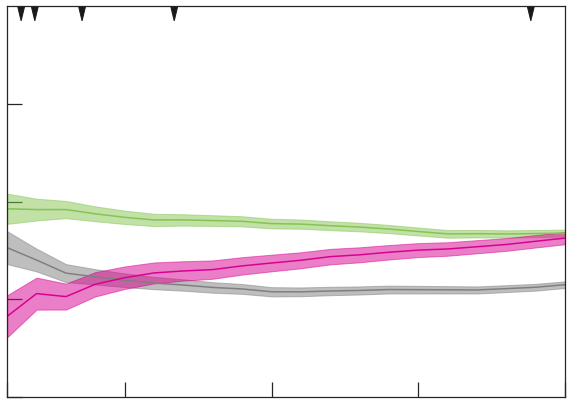

In [43]:
fig042, ax = plt.subplots(figsize = (10,7))
y_lim = (0,4)
ax.set_ylim(y_lim)

resp_sorted_df_V1['TF_nm'].plot( ax = ax,color = area_colors_dict['V1'] ,label = 'mean TF_nm V1')


ax.fill_between(resp_sorted_df_V1['TF_nm'].index,
                 resp_sorted_df_V1['TF_nm']- 1.96 * (resp_sorted_df_V1['TF_std']/ (np.sqrt(sorted_rvr_V1.shape[0]*resp_sorted_df_V1['dsi_blank_std'].index.values* .01))),
                 resp_sorted_df_V1['TF_nm'] + 1.96 * (resp_sorted_df_V1['TF_std']/ (np.sqrt(sorted_rvr_V1.shape[0]*resp_sorted_df_V1['dsi_blank_std'].index.values* .01))),
               color = area_colors_dict['V1'],
                alpha = 0.5)


resp_sorted_df_AL['TF_nm'].plot( ax = ax,color = area_colors_dict['AL'] ,label = 'mean TF_nm AL')

ax.fill_between(resp_sorted_df_AL['TF_nm'].index,
                 resp_sorted_df_AL['TF_nm']- 1.96 * (resp_sorted_df_AL['TF_std']/ (np.sqrt(sorted_rvr_V1.shape[0]*resp_sorted_df_AL['dsi_blank_std'].index.values* .01))),
                 resp_sorted_df_AL['TF_nm'] + 1.96 * (resp_sorted_df_AL['TF_std']/ (np.sqrt(sorted_rvr_V1.shape[0]*resp_sorted_df_AL['dsi_blank_std'].index.values* .01))),
               color = area_colors_dict['AL'],
                alpha = 0.5)


resp_sorted_df_PM['TF_nm'].plot( ax = ax,color = area_colors_dict['PM'], label = 'mean TF_nm PM')

ax.fill_between(resp_sorted_df_PM['TF_nm'].index,
                 resp_sorted_df_PM['TF_nm']- 1.96 * (resp_sorted_df_PM['TF_std']/ (np.sqrt(sorted_rvr_PM.shape[0]*resp_sorted_df_PM['dsi_blank_std'].index.values* .01))),
                 resp_sorted_df_PM['TF_nm'] + 1.96 * (resp_sorted_df_PM['TF_std']/ (np.sqrt(sorted_rvr_PM.shape[0]*resp_sorted_df_PM['dsi_blank_std'].index.values* .01))),
               color = area_colors_dict['PM'],
                alpha = 0.5)



ax.arrow(rel_vs_resp[rel_vs_resp['Tohmi']].shape[0]/np.float(ncells)*100,
         y_lim[1]+0.5,
         0,
         -0.4,
         width = .1, 
         head_length = 0.25,color =  'k')

ax.arrow(rel_vs_resp[rel_vs_resp['Sun']].shape[0]/np.float(ncells)*100,
         y_lim[1]+0.5,
         0,
         -0.4,
         width = .1, 
         head_length = 0.25,color =  'k')

ax.arrow(rel_vs_resp[rel_vs_resp['Andermann']].shape[0]/np.float(ncells)*100,
         y_lim[1]+0.5,
         0,
         -0.4,
         width = .1, 
         head_length = 0.25,color =  'k')

ax.arrow(rel_vs_resp[rel_vs_resp['Roth']].shape[0]/np.float(ncells)*100,
         y_lim[1]+0.5,
         0,
         -0.4,
         width = .1, 
         head_length = 0.25,color =  'k')

ax.arrow(rel_vs_resp[rel_vs_resp['Marshel']].shape[0]/np.float(ncells)*100,
         y_lim[1]+0.5,
         0,
         -0.4,
         width = .1, 
         head_length = 0.25,color =  'k')

#ax.legend(loc = 'upper_left', fontsize = 'small', bbox_to_anchor=(1, 0.,0.4 , 0.6))

#ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_yticks([0,1,2,3])
ax.set_xticks([5,25,50,75,100])
ax.set_xticks([5, 25, 50, 75, 100])

ax.set_xlabel('')
ax.set_ylabel('')



ax.tick_params(direction = 'in', length = 15, top="off", right="off")

ax.set_xticklabels([])
ax.set_yticklabels([])

sns.set(font_scale = 2, style = 'white')

fig042.savefig(r"C:\Users\nataliam\Documents\ResponsivenessCriteria\191209\Figure5-1-allareas.pdf")



# Figure 4

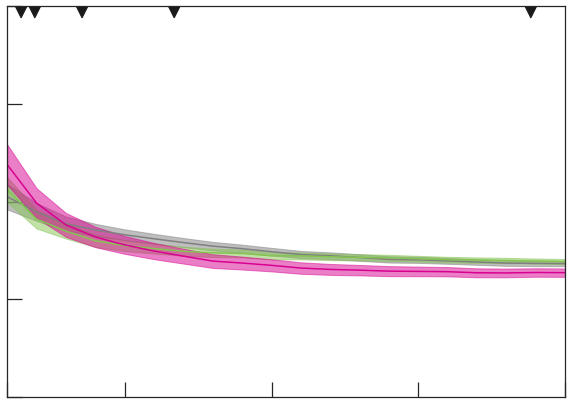

In [44]:
fig042, ax = plt.subplots(figsize = (10,7))
y_lim = (0.3,1)
ax.set_ylim(y_lim)

resp_sorted_df_V1['OSI_nm'].plot( ax = ax,color = area_colors_dict['V1'] ,label = 'mean OSI_nm V1')


ax.fill_between(resp_sorted_df_V1['OSI_nm'].index,
                 resp_sorted_df_V1['OSI_nm']- 1.96 * (resp_sorted_df_V1['gOSI_std']/ (np.sqrt(sorted_rvr_V1.shape[0]*resp_sorted_df_V1['dsi_blank_std'].index.values* .01))),
                 resp_sorted_df_V1['OSI_nm'] + 1.96 * (resp_sorted_df_V1['gOSI_std']/ (np.sqrt(sorted_rvr_V1.shape[0]*resp_sorted_df_V1['dsi_blank_std'].index.values* .01))),
               color = area_colors_dict['V1'],
                alpha = 0.5)


resp_sorted_df_AL['OSI_nm'].plot( ax = ax,color = area_colors_dict['AL'] ,label = 'mean OSI_nm AL')

ax.fill_between(resp_sorted_df_AL['OSI_nm'].index,
                 resp_sorted_df_AL['OSI_nm']- 1.96 * (resp_sorted_df_AL['gOSI_std']/ (np.sqrt(sorted_rvr_V1.shape[0]*resp_sorted_df_AL['dsi_blank_std'].index.values* .01))),
                 resp_sorted_df_AL['OSI_nm'] + 1.96 * (resp_sorted_df_AL['gOSI_std']/ (np.sqrt(sorted_rvr_V1.shape[0]*resp_sorted_df_AL['dsi_blank_std'].index.values* .01))),
               color = area_colors_dict['AL'],
                alpha = 0.5)


resp_sorted_df_PM['OSI_nm'].plot( ax = ax,color = area_colors_dict['PM'], label = 'mean OSI_nm PM')

ax.fill_between(resp_sorted_df_PM['OSI_nm'].index,
                 resp_sorted_df_PM['OSI_nm']- 1.96 * (resp_sorted_df_PM['gOSI_std']/ (np.sqrt(sorted_rvr_PM.shape[0]*resp_sorted_df_PM['dsi_blank_std'].index.values* .01))),
                 resp_sorted_df_PM['OSI_nm'] + 1.96 * (resp_sorted_df_PM['gOSI_std']/ (np.sqrt(sorted_rvr_PM.shape[0]*resp_sorted_df_PM['dsi_blank_std'].index.values* .01))),
               color = area_colors_dict['PM'],
                alpha = 0.5)


ax.arrow(rel_vs_resp[rel_vs_resp['Tohmi']].shape[0]/np.float(ncells)*100,
         y_lim[1]+0.02,
         0,
         -0.02,
         width = .1, 
         head_length = 0.03,color =  'k')

ax.arrow(rel_vs_resp[rel_vs_resp['Sun']].shape[0]/np.float(ncells)*100,
         y_lim[1]+0.02,
         0,
         -0.02,
         width = .1, 
         head_length = 0.03,color =  'k')

ax.arrow(rel_vs_resp[rel_vs_resp['Andermann']].shape[0]/np.float(ncells)*100,
         y_lim[1]+0.02,
         0,
         -0.02,
         width = .1, 
         head_length = 0.03,color =  'k')

ax.arrow(rel_vs_resp[rel_vs_resp['Roth']].shape[0]/np.float(ncells)*100,
         y_lim[1]+0.02,
         0,
         -0.02,
         width = .1, 
         head_length = 0.03,color =  'k')

ax.arrow(rel_vs_resp[rel_vs_resp['Marshel']].shape[0]/np.float(ncells)*100,
         y_lim[1]+0.02,
         0,
         -0.02,
         width = .1, 
         head_length = 0.03,color =  'k')

#ax.legend(loc = 'upper_left', fontsize = 'small', bbox_to_anchor=(1, 0.,0.4 , 0.6))

ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xticks([5, 25, 50, 75, 100])

ax.set_xlabel('')
ax.set_ylabel('')



ax.tick_params(direction = 'in', length = 15, top="off", right="off")

ax.set_xticklabels([])
ax.set_yticklabels([])

sns.set(font_scale = 2, style = 'white')

fig042.savefig(r"C:\Users\nataliam\Documents\ResponsivenessCriteria\191209\Figure5-2-allareas.pdf")


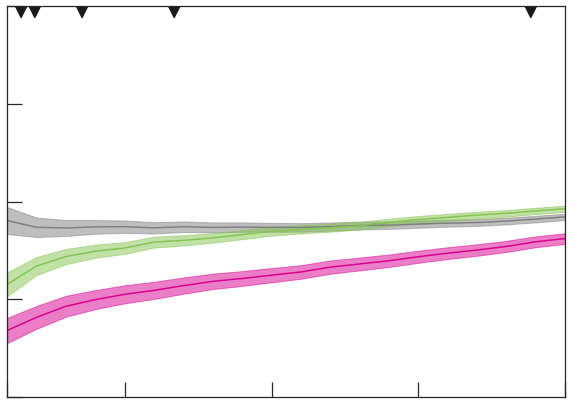

In [45]:
fig043, ax = plt.subplots(figsize = (10,7))
y_lim = (0.3,1)
ax.set_ylim(y_lim)

resp_sorted_df_V1['DSI_nm'].plot( ax = ax,color = area_colors_dict['V1'] ,label = 'mean DSI_nm V1')


ax.fill_between(resp_sorted_df_V1['DSI_nm'].index,
                 resp_sorted_df_V1['DSI_nm']- 1.96 * (resp_sorted_df_V1['dsi_thresh_std']/ (np.sqrt(sorted_rvr_V1.shape[0]*resp_sorted_df_V1['dsi_blank_std'].index.values* .01))),
                 resp_sorted_df_V1['DSI_nm'] + 1.96 * (resp_sorted_df_V1['dsi_thresh_std']/ (np.sqrt(sorted_rvr_V1.shape[0]*resp_sorted_df_V1['dsi_blank_std'].index.values* .01))),
               color = area_colors_dict['V1'],
                alpha = 0.5)


resp_sorted_df_AL['DSI_nm'].plot( ax = ax,color = area_colors_dict['AL'] ,label = 'mean DSI_nm AL')

ax.fill_between(resp_sorted_df_AL['DSI_nm'].index,
                 resp_sorted_df_AL['DSI_nm']- 1.96 * (resp_sorted_df_AL['dsi_thresh_std']/ (np.sqrt(sorted_rvr_V1.shape[0]*resp_sorted_df_AL['dsi_blank_std'].index.values* .01))),
                 resp_sorted_df_AL['DSI_nm'] + 1.96 * (resp_sorted_df_AL['dsi_thresh_std']/ (np.sqrt(sorted_rvr_V1.shape[0]*resp_sorted_df_AL['dsi_blank_std'].index.values* .01))),
               color = area_colors_dict['AL'],
                alpha = 0.5)


resp_sorted_df_PM['DSI_nm'].plot( ax = ax,color = area_colors_dict['PM'], label = 'mean DSI_nm PM')

ax.fill_between(resp_sorted_df_PM['DSI_nm'].index,
                 resp_sorted_df_PM['DSI_nm']- 1.96 * (resp_sorted_df_PM['dsi_thresh_std']/ (np.sqrt(sorted_rvr_PM.shape[0]*resp_sorted_df_PM['dsi_blank_std'].index.values* .01))),
                 resp_sorted_df_PM['DSI_nm'] + 1.96 * (resp_sorted_df_PM['dsi_thresh_std']/ (np.sqrt(sorted_rvr_PM.shape[0]*resp_sorted_df_PM['dsi_blank_std'].index.values* .01))),
               color = area_colors_dict['PM'],
                alpha = 0.5)


ax.arrow(rel_vs_resp[rel_vs_resp['Tohmi']].shape[0]/np.float(ncells)*100,
         y_lim[1]+0.02,
         0,
         -0.02,
         width = .1, 
         head_length = 0.03,color =  'k')

ax.arrow(rel_vs_resp[rel_vs_resp['Sun']].shape[0]/np.float(ncells)*100,
         y_lim[1]+0.02,
         0,
         -0.02,
         width = .1, 
         head_length = 0.03,color =  'k')

ax.arrow(rel_vs_resp[rel_vs_resp['Andermann']].shape[0]/np.float(ncells)*100,
         y_lim[1]+0.02,
         0,
         -0.02,
         width = .1, 
         head_length = 0.03,color =  'k')

ax.arrow(rel_vs_resp[rel_vs_resp['Roth']].shape[0]/np.float(ncells)*100,
         y_lim[1]+0.02,
         0,
         -0.02,
         width = .1, 
         head_length = 0.03,color =  'k')

ax.arrow(rel_vs_resp[rel_vs_resp['Marshel']].shape[0]/np.float(ncells)*100,
         y_lim[1]+0.02,
         0,
         -0.02,
         width = .1, 
         head_length = 0.03,color =  'k')

#ax.legend(loc = 'upper_left', fontsize = 'small', bbox_to_anchor=(1, 0.,0.4 , 0.6))

ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xticks([5, 25, 50, 75, 100])

ax.set_xlabel('')
ax.set_ylabel('')



ax.tick_params(direction = 'in', length = 15, top="off", right="off")

ax.set_xticklabels([])
ax.set_yticklabels([])

sns.set(font_scale = 2, style = 'white')

fig043.savefig(r"C:\Users\nataliam\Documents\ResponsivenessCriteria\191209\Figure5-3-allareas.pdf")


C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\legend.py:325: UserWarning: Unrecognized location "upper_left". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  six.iterkeys(self.codes))))


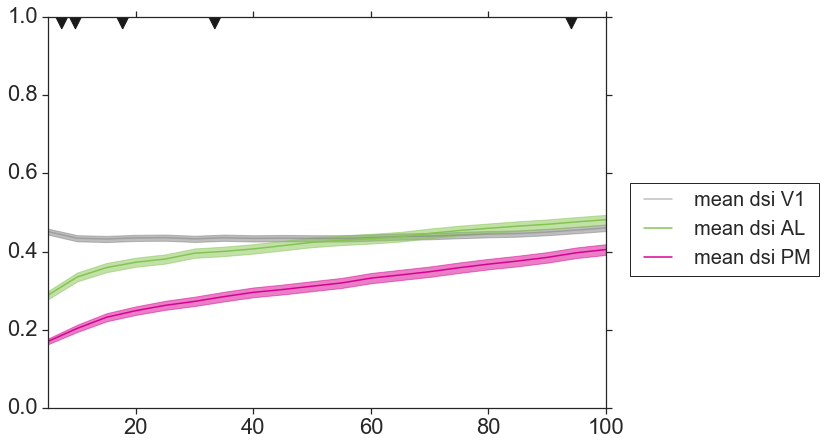

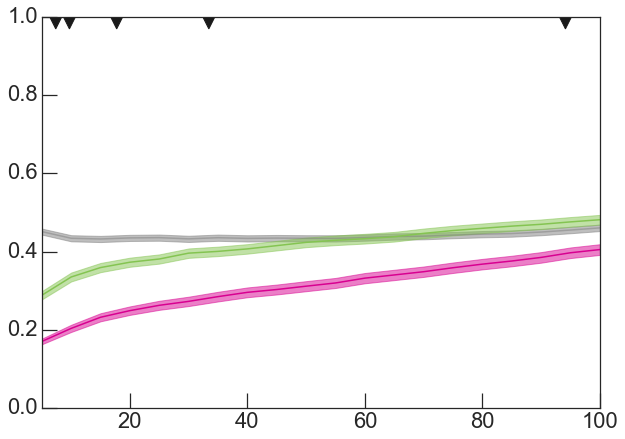

In [46]:
fig043, ax = plt.subplots(figsize = (10,7))
y_lim = (0,1.0)
ax.set_ylim(y_lim)
resp_sorted_df_V1['DSI_nm'] = resp_sorted_df_V1['DSI_nm'].astype(np.float)
resp_sorted_df_AL['DSI_nm'] = resp_sorted_df_AL['DSI_nm'].astype(np.float)
resp_sorted_df_PM['DSI_nm'] = resp_sorted_df_PM['DSI_nm'].astype(np.float)

resp_sorted_df_V1['DSI_nm'].plot( ax = ax,color = area_colors_dict['V1'], label = 'mean dsi V1', alpha = 0.5)

ax.fill_between(resp_sorted_df_V1['DSI_nm'].index,
                 resp_sorted_df_V1['DSI_nm']- 1.96 * (resp_sorted_df_V1['dsi_thresh_std']/ np.sqrt(sorted_rvr_V1.shape[0])),
                 resp_sorted_df_V1['DSI_nm'] + 1.96 * (resp_sorted_df_V1['dsi_thresh_std']/ np.sqrt(sorted_rvr_V1.shape[0])),
               color = area_colors_dict['V1'],
                alpha = 0.5)


resp_sorted_df_AL['DSI_nm'].plot( ax = ax,color = area_colors_dict['AL'] ,label = 'mean dsi AL')

ax.fill_between(resp_sorted_df_AL['DSI_nm'].index,
                 resp_sorted_df_AL['DSI_nm']- 1.96 * (resp_sorted_df_AL['dsi_thresh_std']/ np.sqrt(sorted_rvr_AL.shape[0])),
                 resp_sorted_df_AL['DSI_nm'] + 1.96 * (resp_sorted_df_AL['dsi_thresh_std']/ np.sqrt(sorted_rvr_AL.shape[0])),
                color = area_colors_dict['AL'],
                alpha = 0.5)


resp_sorted_df_PM['DSI_nm'].plot( ax = ax,color = area_colors_dict['PM'], label = 'mean dsi PM')

ax.fill_between(resp_sorted_df_PM['DSI_nm'].index,
                 resp_sorted_df_PM['DSI_nm']- 1.96 * (resp_sorted_df_PM['dsi_thresh_std']/ np.sqrt(sorted_rvr_PM.shape[0])),
                 resp_sorted_df_PM['DSI_nm'] + 1.96 * (resp_sorted_df_PM['dsi_thresh_std']/ np.sqrt(sorted_rvr_PM.shape[0])),
               color = area_colors_dict['PM'],
                alpha = 0.5)



ax.arrow(rel_vs_resp[rel_vs_resp['Tohmi']].shape[0]/np.float(ncells)*100,
         y_lim[1]+0.02,
         0,
         -0.02,
         width = .1, 
         head_length = 0.03,color =  'k')

ax.arrow(rel_vs_resp[rel_vs_resp['Sun']].shape[0]/np.float(ncells)*100,
         y_lim[1]+0.02,
         0,
         -0.02,
         width = .1, 
         head_length = 0.03,color =  'k')

ax.arrow(rel_vs_resp[rel_vs_resp['Andermann']].shape[0]/np.float(ncells)*100,
         y_lim[1]+0.02,
         0,
         -0.02,
         width = .1, 
         head_length = 0.03,color =  'k')

ax.arrow(rel_vs_resp[rel_vs_resp['Roth']].shape[0]/np.float(ncells)*100,
         y_lim[1]+0.02,
         0,
         -0.02,
         width = .1, 
         head_length = 0.03,color =  'k')

ax.arrow(rel_vs_resp[rel_vs_resp['Marshel']].shape[0]/np.float(ncells)*100,
         y_lim[1]+0.02,
         0,
         -0.02,
         width = .1, 
         head_length = 0.03,color =  'k')

ax.legend(loc = 'upper_left', fontsize = 'small', bbox_to_anchor=(1, 0.,0.4 , 0.6))

fig043, ax = plt.subplots(figsize = (10,7))
y_lim = (0,1.0)
ax.set_ylim(y_lim)
resp_sorted_df_V1['DSI_nm'] = resp_sorted_df_V1['DSI_nm'].astype(np.float)
resp_sorted_df_AL['DSI_nm'] = resp_sorted_df_AL['DSI_nm'].astype(np.float)
resp_sorted_df_PM['DSI_nm'] = resp_sorted_df_PM['DSI_nm'].astype(np.float)

resp_sorted_df_V1['DSI_nm'].plot( ax = ax,color = area_colors_dict['V1'], label = 'mean dsi V1', alpha = 0.5)

ax.fill_between(resp_sorted_df_V1['DSI_nm'].index,
                 resp_sorted_df_V1['DSI_nm']- 1.96 * (resp_sorted_df_V1['dsi_thresh_std']/ np.sqrt(sorted_rvr_V1.shape[0])),
                 resp_sorted_df_V1['DSI_nm'] + 1.96 * (resp_sorted_df_V1['dsi_thresh_std']/ np.sqrt(sorted_rvr_V1.shape[0])),
               color = area_colors_dict['V1'],
                alpha = 0.5)


resp_sorted_df_AL['DSI_nm'].plot( ax = ax,color = area_colors_dict['AL'] ,label = 'mean dsi AL')

ax.fill_between(resp_sorted_df_AL['DSI_nm'].index,
                 resp_sorted_df_AL['DSI_nm']- 1.96 * (resp_sorted_df_AL['dsi_thresh_std']/ np.sqrt(sorted_rvr_AL.shape[0])),
                 resp_sorted_df_AL['DSI_nm'] + 1.96 * (resp_sorted_df_AL['dsi_thresh_std']/ np.sqrt(sorted_rvr_AL.shape[0])),
                color = area_colors_dict['AL'],
                alpha = 0.5)


resp_sorted_df_PM['DSI_nm'].plot( ax = ax,color = area_colors_dict['PM'], label = 'mean dsi PM')

ax.fill_between(resp_sorted_df_PM['DSI_nm'].index,
                 resp_sorted_df_PM['DSI_nm']- 1.96 * (resp_sorted_df_PM['dsi_thresh_std']/ np.sqrt(sorted_rvr_PM.shape[0])),
                 resp_sorted_df_PM['DSI_nm'] + 1.96 * (resp_sorted_df_PM['dsi_thresh_std']/ np.sqrt(sorted_rvr_PM.shape[0])),
               color = area_colors_dict['PM'],
                alpha = 0.5)



ax.arrow(rel_vs_resp[rel_vs_resp['Tohmi']].shape[0]/np.float(ncells)*100,
         y_lim[1]+0.02,
         0,
         -0.02,
         width = .1, 
         head_length = 0.03,color =  'k')

ax.arrow(rel_vs_resp[rel_vs_resp['Sun']].shape[0]/np.float(ncells)*100,
         y_lim[1]+0.02,
         0,
         -0.02,
         width = .1, 
         head_length = 0.03,color =  'k')

ax.arrow(rel_vs_resp[rel_vs_resp['Andermann']].shape[0]/np.float(ncells)*100,
         y_lim[1]+0.02,
         0,
         -0.02,
         width = .1, 
         head_length = 0.03,color =  'k')

ax.arrow(rel_vs_resp[rel_vs_resp['Roth']].shape[0]/np.float(ncells)*100,
         y_lim[1]+0.02,
         0,
         -0.02,
         width = .1, 
         head_length = 0.03,color =  'k')

ax.arrow(rel_vs_resp[rel_vs_resp['Marshel']].shape[0]/np.float(ncells)*100,
         y_lim[1]+0.02,
         0,
         -0.02,
         width = .1, 
         head_length = 0.03,color =  'k')

#ax.legend(loc = 'upper_left', fontsize = 'small', bbox_to_anchor=(1, 0.,0.4 , 0.6))
ax.tick_params(direction = 'in', length = 15, top="off", right="off")

#sns.set(font_scale = 2)
#fig043.savefig(r"C:\Users\nataliam\Documents\ResponsivenessCriteria\MeanVsStd\Figure4-3.pdf")
#sns.set(font_scale = 2)
#fig043.savefig(r"C:\Users\nataliam\Documents\ResponsivenessCriteria\191209\Figure4-3.pdf")

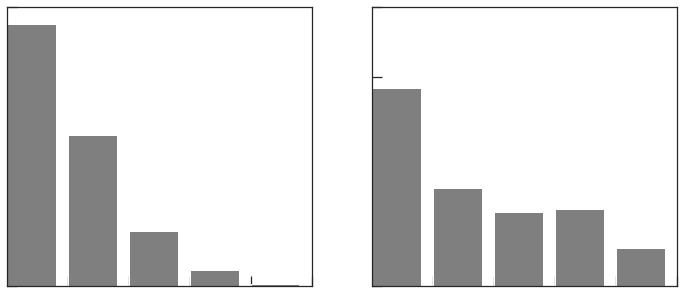

In [48]:
sns.set(font_scale = 1.5, style = 'white')
fig044, ax = plt.subplots(1,2,figsize = (12,5))
ax[0].bar([0,1,2,3,4],
          np.histogram(sorted_rvr_V1['TF_nm'][:347].values,
                       bins = [0,1,2,3,4,5])[0],
          color ='#7F7F7F')

ax[0].set_xticks([1,2,3,4,5])
#ax[0].set_xticklabels([1,2,4,8,15])
#ax[0].set_title('Lower decile of robustness')

ax[1].bar([0,1,2,3,4],
          np.histogram(sorted_rvr_V1['TF_nm'][-347:].values, 
                       bins = [0,1,2,3,4,5])[0],
         color = '#7F7F7F')

ax[1].set_xticks([1,2,3,4,5])
ax[1].set_xticklabels([1,2,4,8,15])
#ax[1].set_title('Upper decile of robustness')

ax[0].set_ylim(0,140)
ax[1].set_ylim(0,140)
ax[1].set_xlabel('')
ax[0].set_xlabel('')
ax[0].set_ylabel('')


ax[0].set_yticks(np.arange(0,250, 50))
ax[1].set_yticks(np.arange(0,250, 50))


ax[0].set_yticklabels([])
ax[0].set_xticklabels([])

ax[1].set_yticklabels([])
ax[1].set_xticklabels([])


ax[0].tick_params(direction = 'in', length = 10,  top="off", right="off")

ax[1].tick_params(direction = 'in', length = 10,  top="off", right="off")


fig044.savefig(r"C:\Users\nataliam\Documents\ResponsivenessCriteria\191209\Figure5-4-octaves.pdf")

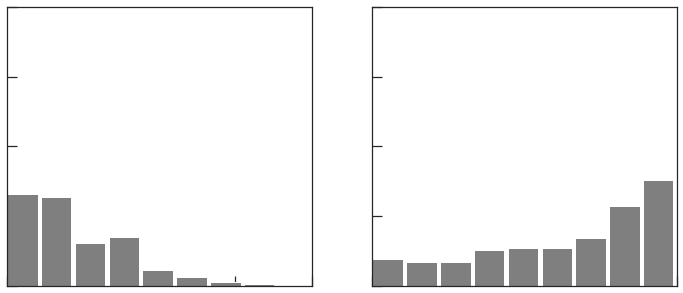

In [49]:
sns.set(font_scale = 1.5, style = 'white')
fig045, ax = plt.subplots(1,2,figsize = (12,5))
bins = np.linspace(0,1,10)
ax[0].bar(bins[:-1],
          np.histogram(sorted_rvr_V1['DSI_nm'][:347].values,
                       bins = bins)[0],
          color ='#7F7F7F', 
          width = .1)


#ax[0].set_title('Lower decile of robustness')

ax[1].bar(bins[:-1],
          np.histogram(sorted_rvr_V1['DSI_nm'][-347:].values, 
                       bins = bins)[0],
         color = '#7F7F7F',
         width = .1)

#ax[1].set_title('Upper decile of robustness')

ax[0].set_ylim(0,180)
ax[1].set_ylim(0,180)
#ax[1].set_xlabel('DSI')
#ax[0].set_xlabel('DSI')
#ax[0].set_ylabel('Count')

for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(5))
    axi.yaxis.set_major_locator(plt.MaxNLocator(5))
    
    
ax[0].set_yticks(np.arange(0,250, 50))
ax[1].set_yticks(np.arange(0,250, 50))
ax[0].set_xticks([0, 0.25, 0.5, 0.75, 1])
ax[1].set_xticks([0, 0.25, 0.5, 0.75, 1])

ax[0].set_xticklabels([])
ax[0].set_yticklabels([])

ax[1].set_xticklabels([])
ax[1].set_yticklabels([])

ax[0].tick_params(direction = 'in', length = 10,  top="off", right="off")

ax[1].tick_params(direction = 'in', length = 10,  top="off", right="off")

    

    
fig045.savefig(r"C:\Users\nataliam\Documents\ResponsivenessCriteria\191209\Figure5-5.pdf")

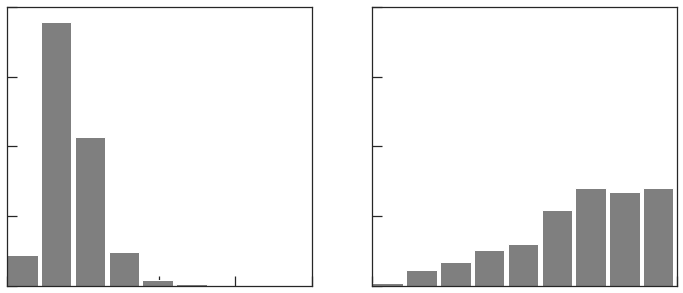

In [50]:
sns.set(font_scale = 1.5, style= 'white')
fig046, ax = plt.subplots(1,2,figsize = (12,5))
bins = np.linspace(0,1.0,10)
ax[0].bar(bins[:-1],
          np.histogram(sorted_rvr_V1['OSI_nm'][:347].values,
                       bins = bins)[0],
          color ='#7F7F7F',
         width = .1)


#ax[0].set_title('Lower decile of robustness')

ax[1].bar(bins[:-1],
          np.histogram(sorted_rvr_V1['OSI_nm'][-347:].values, 
                       bins = bins)[0],
         color = '#7F7F7F',
         width =.1)


#ax[1].set_title('Upper decile of robustness')

ax[0].set_ylim(0,160)
ax[1].set_ylim(0,160)

#ax[1].set_xlabel('gOSI')
#ax[0].set_xlabel('gOSI')
#ax[0].set_ylabel('Count')

for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(5))
    axi.yaxis.set_major_locator(plt.MaxNLocator(5))
    
    
    
ax[0].set_yticks(np.arange(0,250, 50))
ax[1].set_yticks(np.arange(0,250, 50))
ax[0].set_xticks([0, 0.25, 0.5, 0.75, 1])
ax[1].set_xticks([0, 0.25, 0.5, 0.75, 1])

ax[0].set_xticklabels([])
ax[0].set_yticklabels([])

ax[1].set_xticklabels([])
ax[1].set_yticklabels([])

ax[0].tick_params(direction = 'in', length = 10,  top="off", right="off")

ax[1].tick_params(direction = 'in', length = 10,  top="off", right="off")


    
    
fig046.savefig(r"C:\Users\nataliam\Documents\ResponsivenessCriteria\191209\Figure5-6.pdf")

In [51]:
def plot_parallel_coords(df, ax, color_palette, marker_face_color = None):
    if marker_face_color == None:
        marker_face_color = color_palette
    for ii, va in enumerate(df.index):
        ax.plot(np.arange(len(df.columns)),
                  df.loc[va],
                  color = color_palette[ii],
                  mec = 'k',
                  mfc = marker_face_color[ii],
                  lw = 2,
                  marker = 'o',
                  ms = 5,
                  mew =1,
                  label = va)

In [52]:

area_colors_n = ['#7F7F7F','#764C9E', '#D80090','#84C451','#3B51A3' ,'#226633']



#'#9100AA'

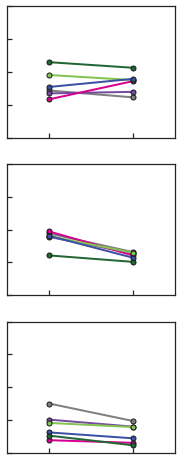

In [53]:
fig051, axs =plt.subplots(3,1, figsize = (3,8))

sns.set(style = 'white')
df_TF_nm = pd.DataFrame(columns = ['low', 'high'], index = area_order)

for area in area_order: 
    rel_vs_resp_sub = rel_vs_resp_all[rel_vs_resp_all['area'] == area]
    resp_sorted_df, sorted_rvr= get_sorted_df(rel_vs_resp_sub, sort_by = 'coeff_var')
    
    ncells = sorted_rvr['TF_nm'].shape[0]
    decile_list = np.zeros(ncells)
    decile_num = ncells/10
    decile_means = np.mean(sorted_rvr['TF_nm'][-decile_num:])
    
    
    df_TF_nm.loc[area, 'low'] = decile_means
    df_TF_nm.loc[area, 'high'] = np.mean(sorted_rvr['TF_nm'])

    


#for

plot_parallel_coords(df_TF_nm, axs[0], area_colors_n)

axs[0].set_xlim(-0.5, 1.5)
axs[0].set_ylim(0,4)
#axs[0].set_ylabel('TF_nm (Hz)')

axs[0].set_xticks([0,1])
axs[0].set_yticks([0, 1, 2, 3,4])
axs[0].set_xticklabels([])
axs[0].set_yticklabels([])

axs[0].tick_params(direction = 'in', length = 5, top = 'off', right = 'off')
axs[1].tick_params(direction = 'in', length = 5, top = 'off', right = 'off')
axs[2].tick_params(direction = 'in', length = 5, top = 'off', right = 'off')


df2 = pd.DataFrame(columns = ['low', 'high'], index = area_order)

for area in area_order: 
    rel_vs_resp_sub = rel_vs_resp_all[rel_vs_resp_all['area'] == area]
    resp_sorted_df, sorted_rvr= get_sorted_df(rel_vs_resp_sub, sort_by = 'coeff_var')
    
    ncells = sorted_rvr['DSI_nm'].shape[0]
    decile_list = np.zeros(ncells)
    decile_num = ncells/10
    decile_means = np.mean(sorted_rvr['DSI_nm'][-decile_num:])
    
    
    df2.loc[area, 'low'] = decile_means
    df2.loc[area, 'high'] = np.mean(sorted_rvr['DSI_nm'])
    
    


#for

plot_parallel_coords(df2, axs[2], area_colors_n)

axs[2].set_xlim(-0.5, 1.5)
axs[2].set_ylim(0, 1)
#axs[2].set_ylabel('DSI')

axs[2].set_xticks([0,1])

axs[2].set_yticks([0, 0.25, 0.5, 0.75, 1.0])
axs[2].set_xticklabels([])
axs[2].set_yticklabels([])

df3 = pd.DataFrame(columns = ['low', 'high'], index = area_order)

for area in area_order: 
    rel_vs_resp_sub = rel_vs_resp_all[rel_vs_resp_all['area'] == area]
    resp_sorted_df, sorted_rvr= get_sorted_df(rel_vs_resp_sub, sort_by = 'coeff_var')
    
    ncells = sorted_rvr['OSI_nm'].shape[0]
    decile_list = np.zeros(ncells)
    decile_num = ncells/10
    decile_means = np.mean(sorted_rvr['OSI_nm'][-decile_num:])
    
    
    df3.loc[area, 'low'] = decile_means
    df3.loc[area, 'high'] = np.mean(sorted_rvr['OSI_nm'])
    
    


#for

plot_parallel_coords(df3, axs[1], area_colors_n)

axs[1].set_xlim(-0.5, 1.5)
axs[1].set_ylim(0, 1)
#axs[1].set_ylabel('OSI_nm')

axs[1].set_xticks([0,1])
axs[1].set_yticks([0, 0.25, 0.5, 0.75, 1.0])
axs[1].set_xticklabels([])
axs[1].set_yticklabels([])


fig051.savefig(r"C:\Users\nataliam\Documents\ResponsivenessCriteria\191209\Figure51.pdf")
#ax.legend(loc = 'upper_left', fontsize = 'small', bbox_to_anchor=(1, 0.,0.4 , 0.6))

In [54]:
np.max(sorted_rvr['TF_nm'])


4.0

In [55]:
rel_vs_resp_all= rel_vs_resp_all[~np.isnan(rel_vs_resp_all['std_14'])]
rel_vs_resp_all = rel_vs_resp_all[~np.isnan(rel_vs_resp_all['mean_14'])]
rel_vs_resp_all= rel_vs_resp_all[~np.isnan(rel_vs_resp_all['std_4'])]
rel_vs_resp_all = rel_vs_resp_all[~np.isnan(rel_vs_resp_all['mean_4'])]


In [56]:
cv_mean = np.empty((6))
for i,nt in enumerate([4,6,8,10,12,14]):
    cv_name = 'cv_'+str(nt)
    cv_mean[i] = np.nanmean(rel_vs_resp_all[cv_name])

In [57]:
np.sum(rel_vs_resp_all['cv_4'] > 100)

0

In [58]:
def plot_density(x_name, y_name, data, ax = None):
    
    x = data[x_name]
    y = data[y_name]
    xy = np.vstack([x,y])
    z = st.gaussian_kde(xy)
    positions = np.vstack([x.ravel(), y.ravel()])
    
    Z = np.reshape(z(positions).T, x.shape)
    #print z.max()
    if ax == None:
        plt.scatter(x, y, c=z, s=10, edgecolor='', cmap='hot',label = '_nolegend_')

    else:
        ax.scatter(x, y, c=Z, s=20, edgecolor='', cmap='plasma', vmax = 0.0077)
        
        
    #plt.colorbar()


In [59]:
rel_vs_resp_all['cv_4'] = rel_vs_resp_all.std_4/rel_vs_resp_all.mean_4
rel_vs_resp_all['cv_6'] = rel_vs_resp_all.std_6/rel_vs_resp_all.mean_6
rel_vs_resp_all['cv_8'] = rel_vs_resp_all.std_8/rel_vs_resp_all.mean_8
rel_vs_resp_all['cv_10'] = rel_vs_resp_all.std_10/rel_vs_resp_all.mean_10
rel_vs_resp_all['cv_12'] = rel_vs_resp_all.std_12/rel_vs_resp_all.mean_12
rel_vs_resp_all['cv_14'] = rel_vs_resp_all.std_14/rel_vs_resp_all.mean_14

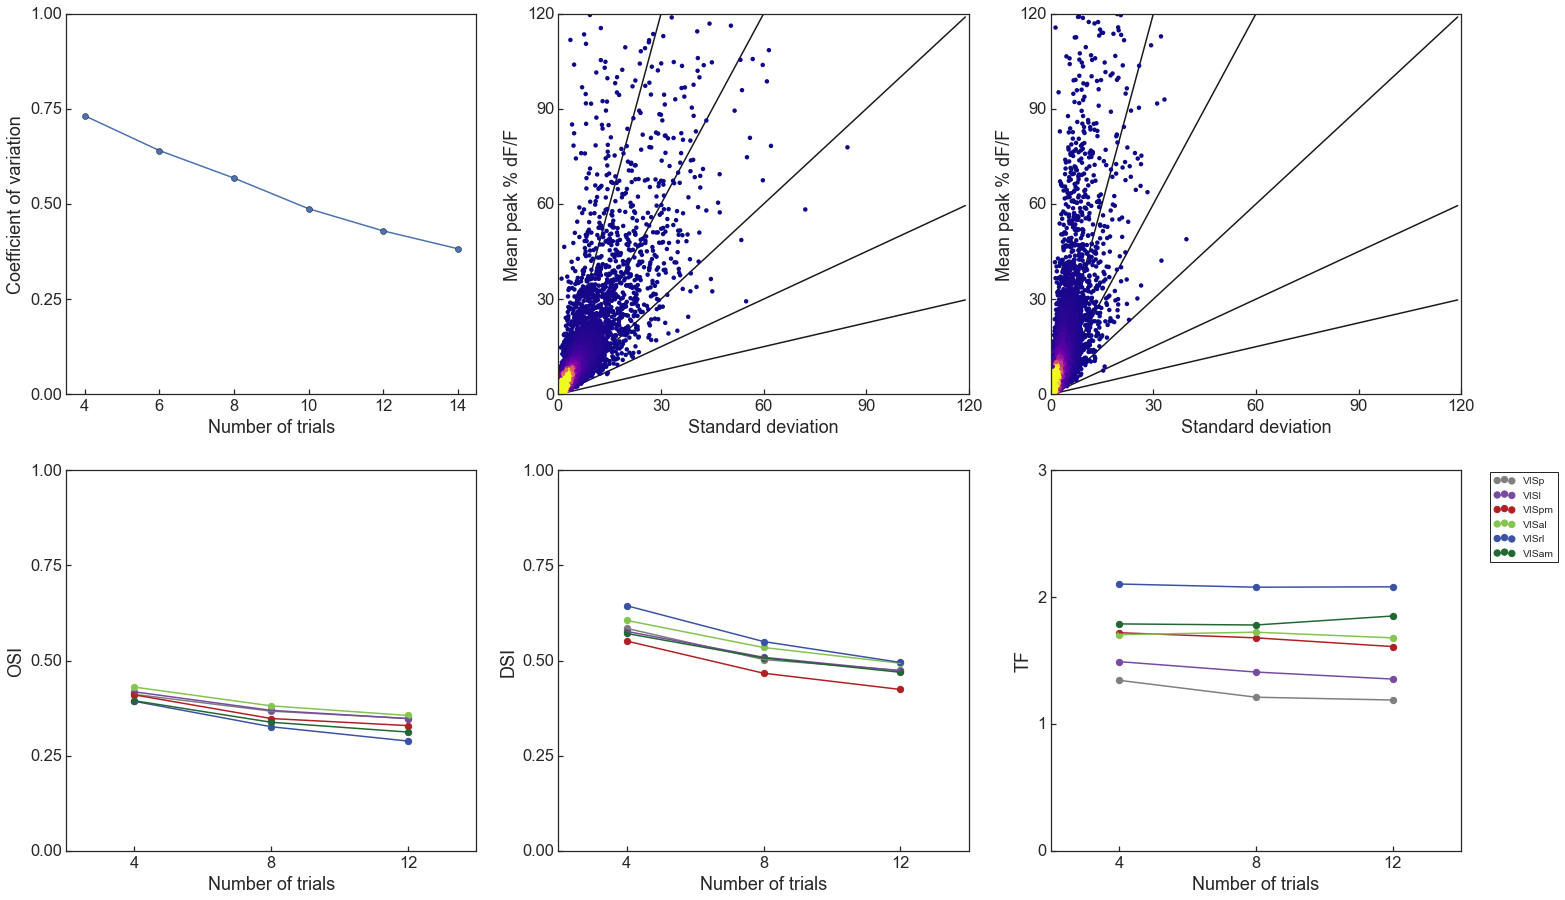

In [60]:
import scipy.stats as st
sns.set(font_scale = 1.5, style = 'white')
#plt.tight_layout()
fig02, axs = plt.subplots(2,3, figsize = (25,15))



ax0 = axs[0,0]

ax1 = axs[0,1]

ax2 = axs[0, 2]

ax3 = axs[1,0]
ax5 = axs[1, 1]
ax4 = axs[1, 2]

ax0.plot(range(4,15,2), cv_mean, 'o-')
ax0.set_ylabel("Coefficient of variation")
ax0.set_xlabel("Number of trials")

ax0.set_ylim(0,1)
ax0.set_xlim(3.5, 14.5)
ax0.set_yticks([0, 0.25, 0.5, 0.75, 1])
#ax0.set_ylim(0,1.5)

plot_density('std_14','mean_14', rel_vs_resp_all, ax2)
plot_density('std_4','mean_4', rel_vs_resp_all, ax1)
 
ax1.set_ylim(0,120)
ax1.set_xlim(0,120)


ax2.set_ylim(0,120)
ax2.set_xlim(0,120)
#ax1.set_title('All cells')
ax0.tick_params(direction = 'in', length = 5, top="off", right="off")

ax1.tick_params(direction = 'in', length = 5, top="off", right="off")
ax2.tick_params(direction = 'in', length = 5, top="off", right="off")

#ax1.plot(np.arange(100), color = 'k', lw = 2, label = 'unity line')
#ax1.set_ylabel('')
ax1.set_xlabel('Standard deviation')
ax1.set_ylabel('Mean peak % dF/F')

ax2.set_xlabel('Standard deviation')
ax2.set_ylabel('Mean peak % dF/F')


ax1.plot(0.25*np.arange(120), color = 'k', zorder = 0)

ax1.plot(0.5*np.arange(120), color = 'k', zorder = 0)
ax1.plot(np.arange(120), color = 'k', zorder = 0)
ax1.plot(2*np.arange(120), color = 'k', zorder = 0)
ax1.plot(4*np.arange(120), color = 'k', zorder = 0)

ax2.plot(0.25*np.arange(120), color = 'k', zorder = 0)

ax2.plot(0.5*np.arange(120), color = 'k', zorder = 0)
ax2.plot(np.arange(120), color = 'k', zorder = 0)
ax2.plot(2*np.arange(120), color = 'k', zorder = 0)
ax2.plot(4*np.arange(120), color = 'k', zorder = 0)



ax1.set_yticks([0, 30, 60, 90, 120])
ax2.set_yticks([0, 30, 60, 90, 120])
ax1.set_xticks([0, 30, 60, 90, 120])
ax2.set_xticks([0, 30, 60, 90, 120])
sns.set(font_scale = 1.5, style = 'white')
rvra = rel_vs_resp_all
#fig, ax = plt.subplots(1,3, figsize = (21,7))


color = ['#7F7F7F','#764C9E','#B11F24','#84C451','#3B51A3' ,'#226633']
areas = ['VISp', 'VISl', 'VISpm', 'VISal', 'VISrl', 'VISam']
for aa, area in enumerate(areas): 
    a = rvra[rvra['area'] == area]
    b = a['osi_12'].values.mean()
    
    ax3.scatter(np.arange(3), [np.nanmean(a['osi_4'].values), np.nanmean(a['osi_8'].values), np.nanmean(a['osi_12'].values)], color = color[aa], label = area, s = 40)
    ax5.scatter(np.arange(3), [a['dsi_4'].values.mean(), a['dsi_8'].values.mean(), a['dsi_12'].values.mean()], color = color[aa], label = area, s = 40)
    ax4.scatter(np.arange(3), [a['tf_4'].values.mean(), a['tf_8'].values.mean(), a['tf_12'].values.mean()], color = color[aa], label = area, s = 40)
    
    ax3.plot(np.arange(3), [np.nanmean(a['osi_4'].values), np.nanmean(a['osi_8'].values), np.nanmean(a['osi_12'].values)], color = color[aa])#, label = area, s = 40)
    ax5.plot(np.arange(3), [a['dsi_4'].values.mean(), a['dsi_8'].values.mean(), a['dsi_12'].values.mean()], color = color[aa])#, label = area, s = 40)
    ax4.plot(np.arange(3), [a['tf_4'].values.mean(), a['tf_8'].values.mean(), a['tf_12'].values.mean()], color = color[aa])
    
ax3.set_ylabel('OSI')
ax3.set_xlabel('Number of trials')
ax5.set_ylabel('DSI')
ax5.set_xlabel('Number of trials')
ax4.set_ylabel('TF')
ax4.set_xlabel('Number of trials')

ax3.set_xticks(np.arange(3))

ax5.set_xticks(np.arange(3))
ax4.set_xticks(np.arange(3))
ax3.set_xticklabels([4,8,12])
ax5.set_yticks([0, 0.25, 0.5, 0.75, 1])

ax5.set_xticklabels([4,8,12])
ax4.set_yticks([0,1,2,3])
ax4.set_xticklabels([4,8,12])
ax3.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax4.legend(bbox_to_anchor=(1.25, 1.01), fontsize = 'xx-small')
ax3.set_ylim(0,1)
ax5.set_ylim(0,1)
ax4.set_ylim(0,3)

ax3.tick_params(direction = 'in', length = 5, top="off", right="off")
ax5.tick_params(direction = 'in', length = 5, top="off", right="off")
ax4.tick_params(direction = 'in', length = 5, top="off", right="off")

fig02.savefig(r"C:\Users\nataliam\Documents\ResponsivenessCriteria\191209\Figure6.pdf")

In [61]:
rel_vs_resp_all = rel_vs_resp_all[~np.isnan(rel_vs_resp_all.coeff_var)]

In [62]:
rel_vs_resp_all.shape

(16777, 74)

(-10, 10)

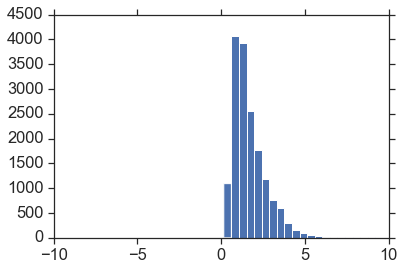

In [63]:
plt.hist(rel_vs_resp_all.coeff_var,  bins = 1000)
plt.xlim(-10,10)
#plt.xlim(0,100)

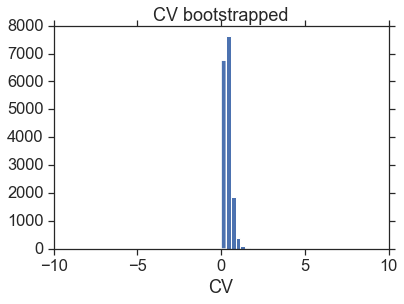

In [64]:
#rel_vs_resp_all = rel_vs_resp_all[~np.isnan(rel_vs_resp_all.cv_14)]
plt.hist(rel_vs_resp_all.cv_14)#, 20000)
plt.xlim(-10,10)
plt.title('CV bootstrapped')
plt.xlabel('CV')

In [65]:
np.sum(rel_vs_resp_all['mean_14']< 0)

0

In [66]:
rel_vs_resp_all.cv_14

0        0.234567
1        0.447230
2        0.355738
3        0.306641
4        0.085858
5        0.327650
6        0.675651
7        0.466995
8        0.352812
9        0.220110
10       0.209179
12       0.197907
13       0.269600
14       0.149930
16       0.141872
17       0.237419
18       0.306632
19       0.195897
21       0.282493
22       0.914446
23       0.290028
24       0.331693
25       0.898138
26       0.597845
27       0.259174
28       0.479753
29       0.119949
30       0.291195
31       0.430058
32       0.399122
           ...   
16750    0.219822
16751    0.321412
16752    0.274326
16753    0.453335
16754    0.299671
16755    0.081513
16756    0.244234
16757    0.680973
16758    0.087500
16759    0.591813
16760    0.191798
16761    0.431842
16762    0.150077
16763    0.107989
16764    0.789107
16765    0.233898
16766    0.127706
16767    0.154238
16768    0.232075
16769    0.266565
16770    0.264969
16771    0.500346
16772    0.140397
16773    0.108467
16774    0